# <center> *Car Price Prediction using Linear Regression*
One of the main areas of research in machine learning is the prediction of the price of cars. It is based on finance and the marketing domain. It is a major research topic in machine learning because the price of a car depends on many factors. The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more.

In [15]:
# IMPORT ESSENTIAL LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [16]:
# LOAD RAW DATASET TO THE ENVIRONMENT

df = pd.read_csv('car_price_prediction.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'car_price_prediction.csv'

In [ ]:
# VIEW TOP 10 DATA
df.head(10)

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310
1,Oct_2006,77313,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575
2,Sept_2006,44214,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787
3,Jul_2006,50880,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847
4,Mar_2006,40810,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575
5,Jan_2006,64660,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,13727
6,Jun_2006,100289,Diesel,90,Metallic,Manual,2000,3,4,5,1,17914
7,Mar_2006,80442,Diesel,90,Metallic,Manual,2000,3,4,5,0,19716
8,Jun_2006,20882,Petrol,192,Non-Metallic,Manual,1800,3,4,5,0,22790
9,Oct_2006,75406,Diesel,69,Non-Metallic,Manual,1900,3,4,5,0,13727


In [ ]:
#check for missing data
df.isnull()

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#sum the total null values
df.isnull().sum()

mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

In [ ]:
#check the data type
df.dtypes

mon_year         object
KM_driven         int64
Fuel_Type        object
Horse_Power       int64
Color            object
Transmission     object
Engine            int64
Doors             int64
Cylinders         int64
Gears             int64
Sport_Model       int64
selling_price     int64
dtype: object

In [ ]:
# check percentage of fuel types 
df['Fuel_Type'].value_counts(normalize=True)

Fuel_Type
Petrol    0.880223
Diesel    0.107939
CNG       0.011838
Name: proportion, dtype: float64

## EXPLORATORY DATA ANALYSIS (EDA)

<Axes: title={'center': 'Fuel_types'}, ylabel='proportion'>

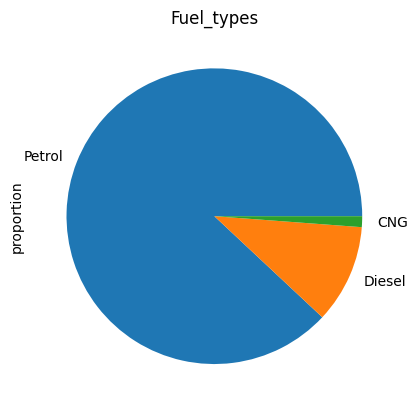

In [ ]:
#plot a pie chart to check percentage of fuel types 
df['Fuel_Type'].value_counts(normalize=True).plot.pie(title='Fuel_types')

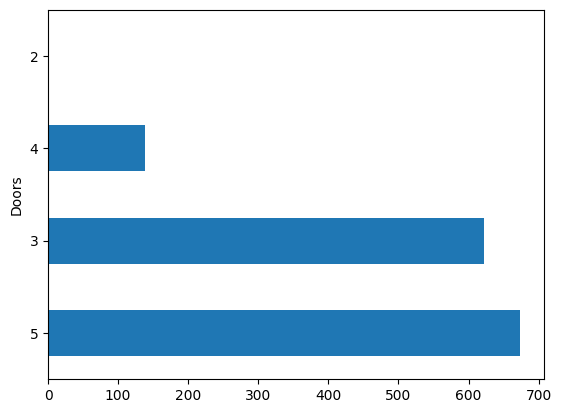

In [ ]:
# plot  the bar graph of count of doors
df['Doors'].value_counts().plot.barh()
plt.show()

In [ ]:
# If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc.
df.KM_driven.describe() 
# dataframe["variable_name"] can also be written as dataframe.variable_name exp:df["KM_driven"] can also be written as df.KM_driven

count      1436.000000
mean      72645.248607
std       39756.831763
min           1.000000
25%       45580.000000
50%       67193.000000
75%       92242.000000
max      257580.000000
Name: KM_driven, dtype: float64

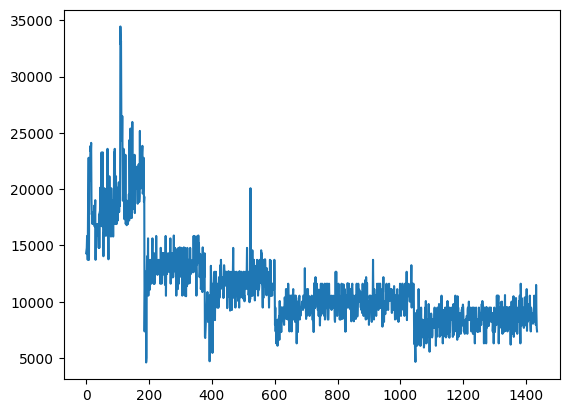

In [ ]:
# plot Selling Price column
plt.plot(df.selling_price)
plt.show()

## EDA - Bivariate Analysis


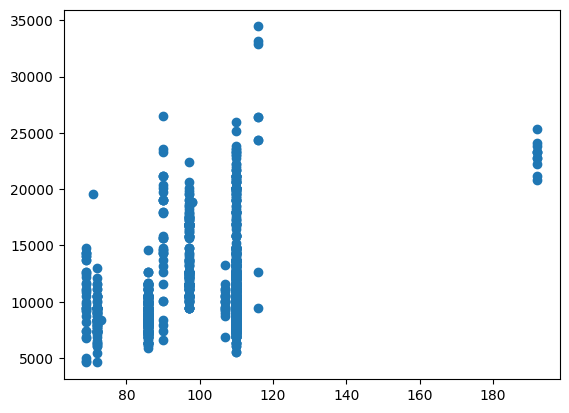

In [ ]:
# plot the scatter plot of selling_price and Horse_Power in data
plt.scatter(df.Horse_Power, df.selling_price)
plt.show()

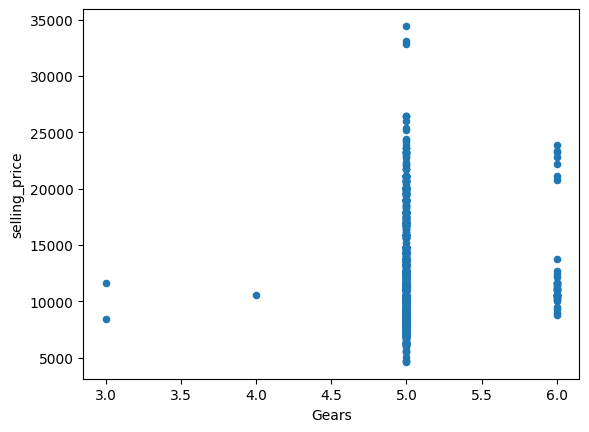

In [ ]:
# plot the scatter plot selling_price and Gears variable in data
df.plot.scatter(x='Gears', y='selling_price')
plt.show()

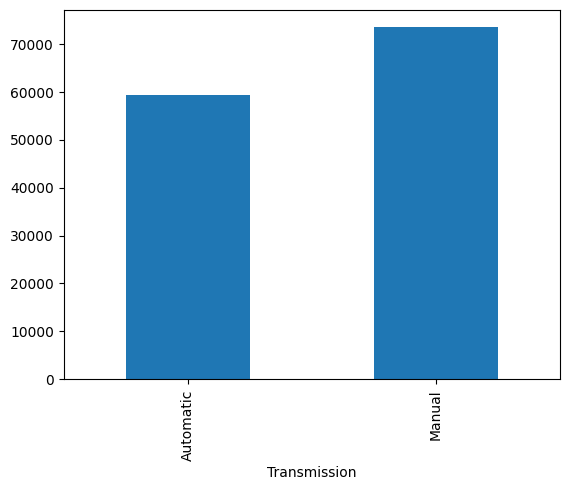

In [ ]:
#plot the bar graph of Transmission with average value of KM_driven
df.groupby('Transmission')['KM_driven'].mean().plot.bar()
plt.show()

## EDA - Multivariate Analysis



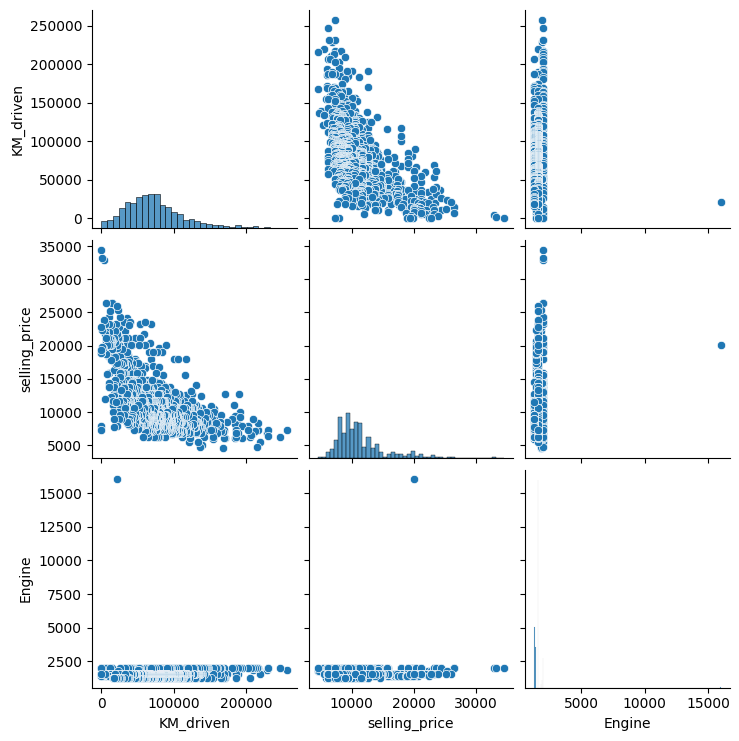

In [ ]:
# A multivariate analysis of KM_driven, selling_price, Engine variables using pairplot
sns.pairplot(data = df, vars=['KM_driven', 'selling_price', 'Engine'])
plt.show()

Color  Metallic  Non-Metallic
Doors                        
2      5.000000      5.000000
3      5.071795      5.051724
4      4.979798      5.000000
5      5.004175      4.989744


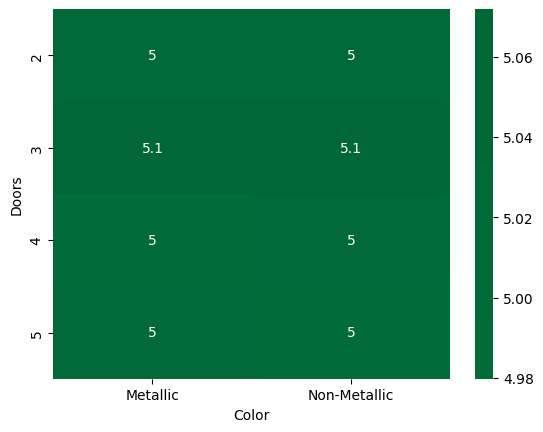

In [ ]:
# create pivot table of Doors vs Color vs Gears
result = pd.pivot_table(data=df, index='Doors', columns='Color',values='Gears')
print(result)

# create heat map of Doors vs Color vs Gears
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

c:\Users\CATALYST.DESKTOP-GOMJGCL\Documents\practice\playground\ass1\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


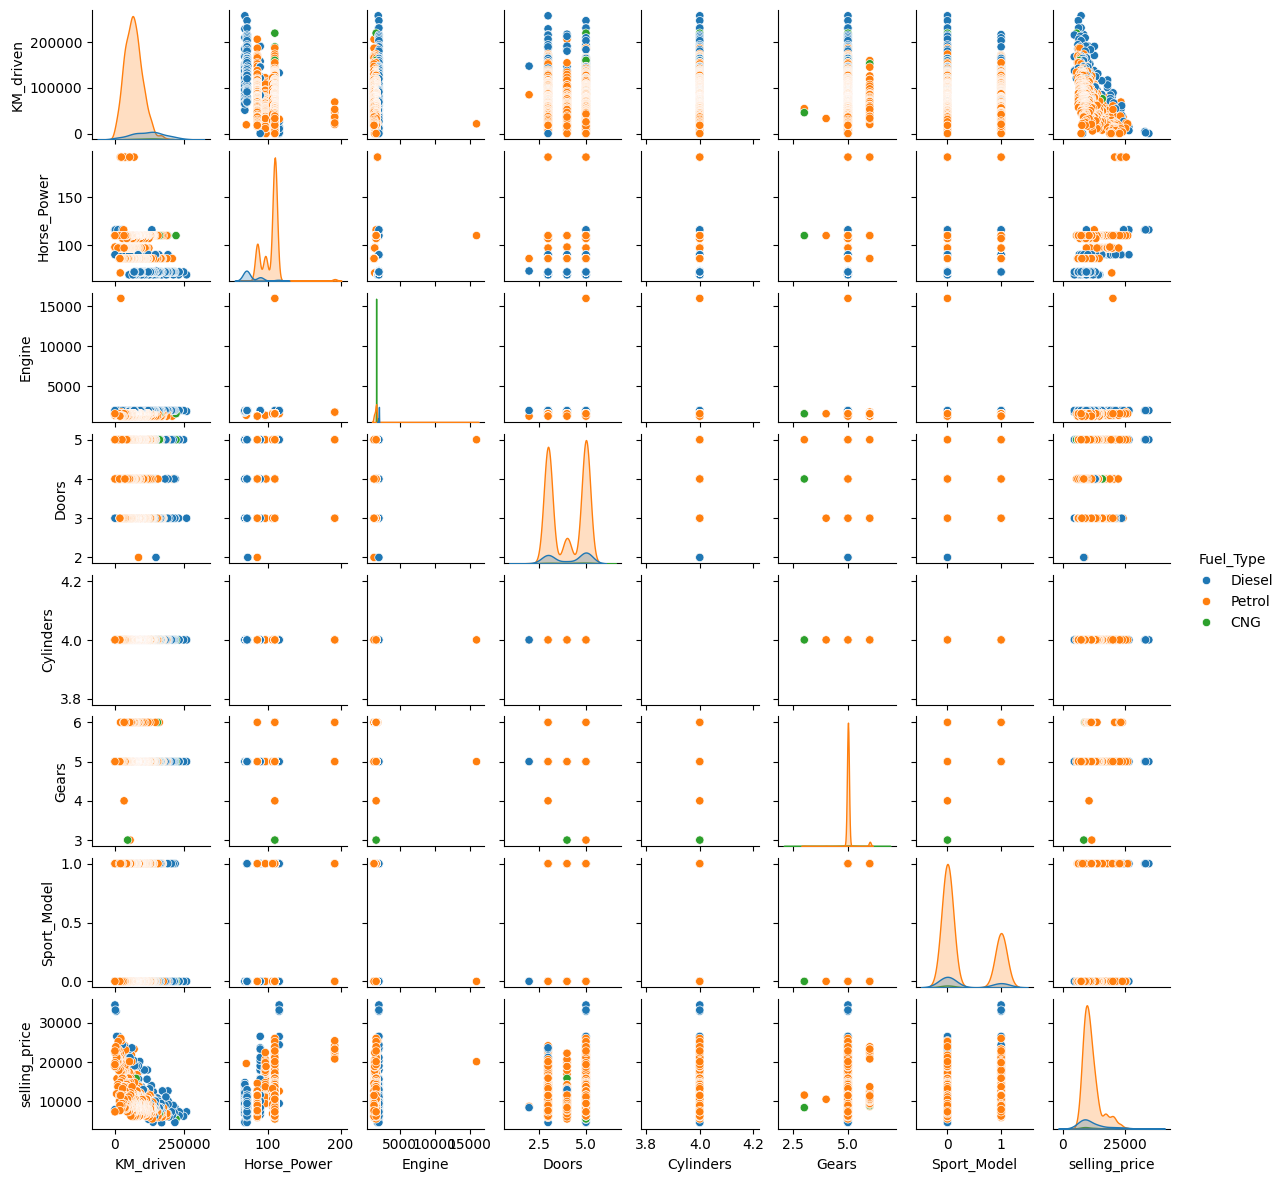

In [ ]:
# plot a pairplot
sns.pairplot(df,hue ='Fuel_Type',size = 1.5)
plt.show()

# DATA PREPROCESSING
### Feature Processing
Look at the feature mon_year, it has discrete values but they ranges very widely and hence doesn't make sense as a variable for our model. Instead if we can try to change the variable into something meaningful, such how old the car is, or in which month or in which year the car was sold, then it would be more useful as a feature in the data. This kind of preprocessing of feature to make them more meaningful is called feature preprocessing.


In [ ]:
# check the value_counts for mon_year column
df.mon_year.value_counts()

mon_year
Jan_2003    69
Apr_2003    63
Jan_2002    59
Mar_2002    47
Jul_2003    42
            ..
Aug_2008     2
Jul_2008     2
Nov_2007     1
Mar_2008     1
Mar_2007     1
Name: count, Length: 77, dtype: int64

In [ ]:
# split the object from '_'. We will build two new features from this existing one.
df["mon"] = df["mon_year"].str.split('_',n = 1, expand = True)[0]
df["year"] = df["mon_year"].str.split('_',n = 1, expand = True)[1]
# drop the previous column
df.drop("mon_year",axis=1,inplace=True)
# check how these two new features look in data frame
df.head()

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,mon,year
0,49805,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310,Oct,2006
1,77313,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575,Oct,2006
2,44214,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787,Sept,2006
3,50880,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847,Jul,2006
4,40810,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575,Mar,2006


In [ ]:
print(df.year.value_counts())
print(df.mon.value_counts())

year
2003    441
2002    392
2004    225
2005    192
2006     87
2007     75
2008     24
Name: count, dtype: int64
mon
Jan     207
Apr     154
Mar     138
Feb     134
Jul     133
Jun     120
May     118
Aug     115
Oct     101
Sept     76
Nov      72
Dec      68
Name: count, dtype: int64


## Encoding Categories
Encoding categorical variables is very important if not crucial this is because machine learning models are mathematical models that use algorithms that work with numerical data types. This is why, we need encoding methods to convert non-numerical data to meaningful numerical data. For this we look at Pandas get_dummies method.

In [ ]:
# check encoding on Fuel_Type column using pandas get_dummies method
pd.get_dummies(df["Fuel_Type"])

,CNG,Diesel,Petrol
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1431,False,False,True
1432,False,False,True
1433,False,False,True
1434,False,False,True


In [ ]:
# check encoding on Fuel_Type column using pandas get_dummies method
pd.get_dummies(df["Fuel_Type"]).astype(int)

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [ ]:
# create dummies for categorical variables and print them
dummies = pd.get_dummies(df[["Fuel_Type","Color","Transmission","mon","year"]])
dummies

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Color_Metallic,Color_Non-Metallic,Transmission_Automatic,Transmission_Manual,mon_Apr,mon_Aug,mon_Dec,...,mon_Nov,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,False,True,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,False,True,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,False,True,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
3,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,True,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1432,False,False,True,False,True,False,True,False,False,False,...,False,False,True,True,False,False,False,False,False,False
1433,False,False,True,False,True,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1434,False,False,True,True,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,False


In [ ]:
# create dummies for categorical variables and print them
dummies = pd.get_dummies(df[["Fuel_Type","Color","Transmission","mon","year"]]).astype(int)
dummies

NameError: name 'df' is not defined

In [ ]:
# concat the created dummies with the original df and drop those categorical columns
encoded_df = pd.concat([df,dummies],axis=1)
encoded_df.drop(["Fuel_Type","Color","Transmission","mon","year"],axis=1,inplace=True)

NameError: name 'df' is not defined

In [ ]:
encoded_df.head()

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price,Fuel_Type_CNG,Fuel_Type_Diesel,...,mon_Nov,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,49805,90,2000,3,4,5,0,14310,0,1,...,0,1,0,0,0,0,0,1,0,0
1,77313,90,2000,3,4,5,0,14575,0,1,...,0,1,0,0,0,0,0,1,0,0
2,44214,90,2000,3,4,5,0,14787,0,1,...,0,0,1,0,0,0,0,1,0,0
3,50880,90,2000,3,4,5,0,15847,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40810,90,2000,3,4,5,0,14575,0,1,...,0,0,0,0,0,0,0,1,0,0


### Feature Scaling 
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

In [ ]:
# Creating X and Y
y = encoded_df["selling_price"]
X = encoded_df.drop("selling_price",axis=1)

NameError: name 'encoded_df' is not defined

In [ ]:
X.head()

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,...,mon_Nov,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
0,49805,90,2000,3,4,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,77313,90,2000,3,4,5,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,44214,90,2000,3,4,5,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,50880,90,2000,3,4,5,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,40810,90,2000,3,4,5,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0    14310
1    14575
2    14787
3    15847
4    14575
Name: selling_price, dtype: int64

*Creating Training and Testing datasets* \\
We will use sklearn library for this task. We will train_test_split method from sklearn's model_selection. 

test_size is the ratio in which we want to split. Generally, it's between 0.2 and 0.33. During using this method, the data is shuffled so random_state decides which state we want to keep so that everytime we run train_test_split, it doesn't randomly split the data and keeps it same.

In [ ]:
# Splitting Data into training and testing set
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   KM_driven      1436 non-null   int64 
 1   Fuel_Type      1436 non-null   object
 2   Horse_Power    1436 non-null   int64 
 3   Color          1436 non-null   object
 4   Transmission   1436 non-null   object
 5   Engine         1436 non-null   int64 
 6   Doors          1436 non-null   int64 
 7   Cylinders      1436 non-null   int64 
 8   Gears          1436 non-null   int64 
 9   Sport_Model    1436 non-null   int64 
 10  selling_price  1436 non-null   int64 
 11  mon            1436 non-null   object
 12  year           1436 non-null   object
dtypes: int64(8), object(5)
memory usage: 146.0+ KB


In [ ]:
# create training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)

NameError: name 'X' is not defined

In [ ]:
# initializing Linear Regression model using sklearn
from sklearn.linear_model import LinearRegression
simple_lr = LinearRegression()

In [ ]:
# Generating Predictions
y_test_predictions = simple_lr.predict(X_test[['KM_driven']])
y_test_predictions

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Assuming X_test_predictions are already defined
# (and y_test_predictions was generated with: simple_lr.predict(X_test[['KM_driven]]))
comparison_df = pd.DataFrame({
    'KM_driven': X_test['KM_driven'].values,
    'Predicted_Price': y_test_predictions
})

In [ ]:
# Preview first 10 rows
print(comparison_df.head(10))

   KM_driven  Predicted_Price
0      23850     14089.687615
1      85252     10741.287654
2     137800      7875.717784
3      80560     10997.153792
4      62540     11979.828091
5      99724      9952.094399
6      84649     10774.170706
7      60699     12080.222286
8      55062     12387.621565
9      39632     13229.056883


In [ ]:
# Print A and B of Simple Linear Regression line
simple_lr.coef_, simple_lr.intercept_

So, simple_lr.coef_ returns array of coefficients and simple_lr.intercept_ returns the intercept of our equation. With this, we have A = -0.05453243 and B = 15390.285951605727.

### Intepreting results - Analyzing training and testing errors

In [ ]:
# To check Regression model training accuracy using sklearn
simple_lr_F1_score = simple_lr.score(X_train[["KM_driven"]],y_train)
simple_lr_r2 = r2_score(y_test, y_test_predictions)
simple_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_predictions))
simple_lr_mae = mean_absolute_error(y_test, y_test_predictions)

print("F1 score:", simple_lr_F1_score )
print("R\u00B2:", simple_lr_r2 )
print("RMSE:", simple_lr_rmse )
print("MAE:", simple_lr_mae )

NameError: name 'simple_lr' is not defined

Here, simple_lr predicts X_test and calculates mean accuracy with y_test. Therefore, with Simple Linear Regression we obtain score of 0.33 which is very low. So, lets now move towards Multiple Linear Regression approach.

## Multiple Linear Regression

In [ ]:
# initializing Linear Regression model using sklearn
multiple_lr = LinearRegression()

In [ ]:
# Fitting the training data
multiple_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# print the coefficients and intercept for the model
multiple_lr.coef_,multiple_lr.intercept_

(array([-1.61236903e-02,  4.73257381e+01,  2.24912417e-02,  2.47454756e+02,
         5.91171556e-11,  7.49344942e+02,  4.24811452e+00, -6.86216323e+02,
         1.21640900e+03, -5.30192674e+02,  4.89371680e+01, -4.89371680e+01,
         4.41930267e+02, -4.41930267e+02,  2.73747507e+01,  1.03030610e+02,
         1.32447818e+02, -1.42214319e+02, -3.48304508e+02, -1.19448330e+02,
         2.48844414e+02, -1.76254698e+01,  2.64958457e+02, -8.77376684e+01,
        -4.78169141e+01, -1.35088385e+01, -5.36364753e+03, -4.06337192e+03,
        -2.84143849e+03, -1.57512814e+03,  2.52443344e+03,  4.62145040e+03,
         6.69770224e+03]),
 np.float64(6563.517662049224))

In [ ]:
# 3. Combine test features and predicted prices into a comparison DataFrame
comparison_df = X_test.copy()
comparison_df["Predicted_Price"] = y_test_predictions_mlr


In [ ]:
comparison_df.head(40)

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,...,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,Predicted_Price
594,23850,97,1400,3,4,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,14089.687615
754,85252,110,1600,3,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,10741.287654
630,137800,72,2000,4,4,5,0,0,1,0,...,1,0,0,1,0,0,0,0,0,7875.717784
1259,80560,110,1600,5,4,5,0,0,0,1,...,1,0,1,0,0,0,0,0,0,10997.153792
903,62540,110,1600,5,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,11979.828091
1175,99724,110,1600,5,4,5,0,0,0,1,...,0,0,1,0,0,0,0,0,0,9952.094399
762,84649,110,1600,4,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,10774.170706
1372,60699,110,1600,3,4,5,0,0,0,1,...,0,0,1,0,0,0,0,0,0,12080.222286
259,55062,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,12387.621565
316,39632,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,13229.056883


### Interpreting results - Analyzing training and testing errors

In [ ]:
# To check Regression model training accuracy using sklearn
multiple_lr.score(X_train,y_train)

0.8893954094764038

In [ ]:
# check the accuracy on test data
multiple_lr_F1_score = multiple_lr.score(X_test, y_test)
multiple_lr_r2 = r2_score(y_test, y_test_predictions_mlr)
multiple_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_predictions_mlr))
multiple_lr_mae = mean_absolute_error(y_test, y_test_predictions_mlr)

print("F1 score:", multiple_lr_F1_score )
print("R\u00B2:", multiple_lr_r2 )
print("RMSE:", multiple_lr_rmse )
print("MAE:", multiple_lr_mae )

0.8859958571373607


Here, we can see that multiple_lr gives us better results than simple_lr as many other independent variables are also being considered when it comes to predicting selling prices of cars. But can we improve more, so to check that, lets move towards Lasso and Ridge Regression models.

### Lasso Regression 

In [ ]:
# initializing Lasso Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import Lasso
lasso_lr = Lasso(alpha=0.01)

In [ ]:
# fitting the training data
lasso_lr.fit(X_train, y_train)

Lasso(alpha=0.01)

Lasso(alpha=0.01)

In [ ]:
# print the coefficients and intercept for the model
lasso_lr.coef_,lasso_lr.intercept_

(array([-1.61261129e-02,  4.73257483e+01,  2.25597991e-02,  2.47443203e+02,
         0.00000000e+00,  7.49095968e+02,  4.32391425e+00, -1.55182889e+02,
         1.74662539e+03, -0.00000000e+00,  9.78458123e+01, -7.94646112e-15,
         8.83554901e+02, -4.47248400e-12,  4.09935682e+01,  1.16648618e+02,
         1.45861538e+02, -1.28351708e+02, -3.34487067e+02, -1.05588995e+02,
         2.62409271e+02, -3.79452654e+00,  2.78563004e+02, -7.38433786e+01,
        -3.39669226e+01,  7.05913462e-04, -4.66515386e+03, -3.36489432e+03,
        -2.14298313e+03, -8.76648728e+02,  3.22257405e+03,  5.31955724e+03,
         7.39516959e+03]),
 np.float64(4831.679153114736))

In [ ]:
y_test_predictions_lasso = lasso_lr.predict(X_test)
y_test_predictions_lasso

array([11406.33580659,  9585.09764361,  9242.9368847 ,  9155.90837992,
       10723.87514981,  8546.34740736, 10048.40025202,  9293.83262792,
       13535.42559827, 13303.9029149 ,  9859.99161796,  9953.74058458,
       13328.65175601, 12620.61243389, 10007.36758646,  9171.47889072,
       12749.62764576, 17304.85054221,  7922.6694135 ,  9361.03253605,
       13148.99905684, 20009.56494319,  8661.72327576, 11128.23874819,
        7793.61036782, 18031.81854944, 10041.04570184,  7772.25962372,
       17540.63088963, 13932.51500241,  8654.37566038, 10980.71576289,
        9495.69606948, 10060.11845621, 10214.84850952,  8823.2127815 ,
       10207.81184311,  9987.98581856, 17167.8088485 ,  9713.25545708,
       10586.76153198, 10271.71550164,  8959.17115549,  6521.36243448,
        7853.32354118, 19474.92201313, 10316.54563562, 10468.79808442,
        9506.80076978, 13729.45016611, 13178.64704255,  7385.98227775,
       16777.37443057, 17692.80338693,  6646.41262951,  8850.07920347,
      

In [ ]:

lasso_comparison_df = X_test.copy()
lasso_comparison_df['Predicted_Price'] = y_test_predictions_lasso

In [ ]:
# print comparison dataset 
lasso_comparison_df.head(40)

### Interpreting results - Analyzing training and testing errors

In [ ]:
# To check Regression model training acccuracy using sklearn 
lasso_lr_F1_score = lasso_lr.score(X_train, y_train) 


0.8893954061141324

In [ ]:
# check the accuracy on test data
lasso_lr.score(X_test, y_test)
lasso_lr_r2 = r2_score(y_test, y_test_predictions_lasso)
lasso_lr_rsme = np.sqrt(mean_squared_error(y_test, y_test_predictions_lasso))
lasso_lr_mae = mean_absolute_error(y_test, y_test_predictions_lasso)                


0.8859913963573947

### Ridge Regression 

In [ ]:
# initializing Lasso Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import Ridge
ridge_lr = Ridge(alpha=0.0001)

In [ ]:
# Fitting the training data
ridge_lr.fit(X_train, y_train)

c:\Users\CATALYST.DESKTOP-GOMJGCL\Documents\practice\playground\ass1\lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.92525e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.0001)

In [ ]:
# print the coefficients and intercept for the model 
ridge_lr.coef_,ridge_lr.intercept_

(array([-1.61238056e-02,  4.73258031e+01,  2.24917300e-02,  2.47455714e+02,
         0.00000000e+00,  7.49341477e+02,  4.25256426e+00, -6.86212625e+02,
         1.21641150e+03, -5.30198876e+02,  4.89375225e+01, -4.89375246e+01,
         4.41929007e+02, -4.41929006e+02,  2.73747226e+01,  1.03031594e+02,
         1.32444599e+02, -1.42211396e+02, -3.48302098e+02, -1.19447560e+02,
         2.48843161e+02, -1.76257029e+01,  2.64958353e+02, -8.77386936e+01,
        -4.78172976e+01, -1.35096795e+01, -5.36363281e+03, -4.06335914e+03,
        -2.84142615e+03, -1.57511773e+03,  2.52443379e+03,  4.62144499e+03,
         6.69765706e+03]),
 np.float64(6563.524187890379))

In [ ]:
# Generating Predictions
y_test_predictions_ridge = ridge_lr.predict(X_test)
y_test_predictions_ridge


array([11406.07320502,  9584.98554159,  9242.87887227,  9155.76099875,
       10723.90261619,  8546.27958801, 10048.25461267,  9293.8601246 ,
       13535.66277123, 13303.7063953 ,  9859.93601391,  9953.57573789,
       13328.43653183, 12620.30649753, 10007.45762136,  9171.46077285,
       12749.67328428, 17304.91230473,  7922.85755391,  9360.85580614,
       13149.01995986, 20009.59358729,  8661.53105358, 11128.01465439,
        7793.97269512, 18032.11073015, 10041.14303844,  7772.12521462,
       17540.8950337 , 13932.69536063,  8654.45910977, 10980.76236236,
        9495.82674222, 10059.94604211, 10214.65395696,  8823.34384253,
       10207.90846655,  9988.0546089 , 17167.78524875,  9713.16682925,
       10586.76970556, 10271.75506727,  8959.0291066 ,  6521.56450201,
        7853.37826887, 19475.01512019, 10316.62697344, 10468.61238108,
        9506.77585574, 13729.17759652, 13178.28981788,  7385.84028006,
       16777.55158577, 17692.75877371,  6646.29493252,  8849.92836403,
      

In [ ]:
# combine test features and predicted prices into a comparison DataFrame 
ridge_comparison_df = X_test.copy()
ridge_comparison_df['Predicted_Price'] = y_test_predictions_ridge

ridge_comparison_df.head(40)

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,...,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,Predicted_Price
594,23850,97,1400,3,4,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,11406.073205
754,85252,110,1600,3,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,9584.985542
630,137800,72,2000,4,4,5,0,0,1,0,...,1,0,0,1,0,0,0,0,0,9242.878872
1259,80560,110,1600,5,4,5,0,0,0,1,...,1,0,1,0,0,0,0,0,0,9155.760999
903,62540,110,1600,5,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,10723.902616
1175,99724,110,1600,5,4,5,0,0,0,1,...,0,0,1,0,0,0,0,0,0,8546.279588
762,84649,110,1600,4,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,10048.254613
1372,60699,110,1600,3,4,5,0,0,0,1,...,0,0,1,0,0,0,0,0,0,9293.860125
259,55062,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,13535.662771
316,39632,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,13303.706395


## Interpreting results - Analyzing training and testing errors

In [ ]:
# To check Regression model training accuracy using sklearn
ridge_lr.score(X_train, y_train)

0.8893954094731062

In [ ]:
# check accuracy on test data 

ridge_lr_F1_score= ridge_lr.score(X_test, y_test)
ridge_lr_r2 = r2_score(y_test, y_test_predictions_ridge)
ridge_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_predictions_ridge))
ridge_lr_mae = mean_absolute_error(y_test, y_test_predictions_ridge)

0.885995578895092

## ElasticNet Regression 
ElasticNet is a combination of Lasso and Ridge penalties, useful when features are correlated.

In [ ]:
# initializing ElasticNet Regression model using sklearn
# set value of alpha 0.01
from sklearn.linear_model import ElasticNet 

ENet_lr = ElasticNet(alpha=0.00001)

In [ ]:
# Fitting the training data
ENet_lr.fit(X_train, y_train)

c:\Users\CATALYST.DESKTOP-GOMJGCL\Documents\practice\playground\ass1\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.565e+08, tolerance: 1.548e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=1e-05)

In [ ]:
# print the coefficients and intercept for the model
ENet_lr.coef_,ENet_lr.intercept_

(array([-1.61310200e-02,  4.73309059e+01,  2.25041310e-02,  2.47513172e+02,
         0.00000000e+00,  7.49139347e+02,  4.51329332e+00, -2.42367576e+02,
         1.66041901e+03, -8.68176436e+01,  9.57705077e+01, -2.14895774e+00,
         8.08453057e+02, -7.53013471e+01,  3.64111739e+01,  1.12135519e+02,
         1.41283156e+02, -1.32996644e+02, -3.39125070e+02, -1.10367148e+02,
         2.57813735e+02, -8.59915661e+00,  2.73991438e+02, -7.87654489e+01,
        -3.88030770e+01, -4.51881129e+00, -4.73124438e+03, -3.43109869e+03,
        -2.20922092e+03, -9.43042044e+02,  3.15588859e+03,  5.25258274e+03,
         7.32648137e+03]),
 np.float64(5066.165617766975))

In [ ]:
# Generating Predictions
y_test_predictions_ENet = ENet_lr.predict(X_test)
y_test_predictions_ENet


array([11406.34415163,  9585.0341761 ,  9242.88038511,  9155.92356921,
       10724.0450244 ,  8546.46670902, 10048.40277897,  9294.06992836,
       13535.52088154, 13304.01429382,  9860.00114521,  9953.78929293,
       13328.70100701, 12620.32573798, 10007.42023961,  9171.65957657,
       12749.5746456 , 17304.66031238,  7922.59721394,  9361.1101434 ,
       13148.89090888, 20009.0456859 ,  8661.57720517, 11128.06113838,
        7793.65466928, 18031.77044884, 10041.13615185,  7772.13228955,
       17540.69259449, 13932.73111762,  8654.52611467, 10981.05394624,
        9495.96508707, 10059.90993657, 10214.68707331,  8823.28782028,
       10207.87388882,  9988.20583457, 17167.51383629,  9712.96665148,
       10587.05176294, 10271.80231978,  8959.34641811,  6521.12181787,
        7853.53211159, 19474.6326063 , 10316.58463302, 10468.62948795,
        9506.95909574, 13729.62137768, 13178.60788974,  7385.99974088,
       16776.86867297, 17692.6422362 ,  6646.18330663,  8850.21173715,
      

In [ ]:
# print the head
ENet_comparison_df = X_test.copy()
ENet_comparison_df.head(40)

,KM_driven,Horse_Power,Engine,Doors,Cylinders,Gears,Sport_Model,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,...,mon_Nov,mon_Oct,mon_Sept,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008
594,23850,97,1400,3,4,5,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
754,85252,110,1600,3,4,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
630,137800,72,2000,4,4,5,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1259,80560,110,1600,5,4,5,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
903,62540,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1175,99724,110,1600,5,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
762,84649,110,1600,4,4,5,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1372,60699,110,1600,3,4,5,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
259,55062,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
316,39632,110,1600,5,4,5,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Initializing results - Analyzing training and testing errors

In [ ]:
# To check Regression model training accuracy using sklearn
ENet_lr.score(X_train, y_train)

0.8893953973683683

In [ ]:
# check accuracy on test data
ENet_lr_F1_score = ENet_lr.score(X_test, y_test)
ENet_lr_r2_score = r2_score(y_test, y_test_predictions_ENet)
ENet_lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_predictions_ENet))
ENet_lr_mae = mean_absolute_error(y_test, y_test_predictions_ENet)


0.8859801497759382

## COMPARISON TABLE
We create a comparison table of the accuracy metrics of thr different models used

In [ ]:
results = {
    "Model": ["Simple Linear Regression",
              "Multiple Linear Regression", 
              "lasso Regression", 
              "Ridge Regression",
              "ElasticNet Regression"
              ]
    "R\u00B2": [simple_lr_r2, multiple_lr_r2, lasso_lr_r2, ridge_lr_r2, ENet_lr_r2_score]  
    "RMSE": [simple_lr_rmse, multiple_lr_rmse, lasso_lr_rsme, ridge_lr_rmse, ENet_lr_rmse] 
    "MAE": [simple_lr_mae, multiple_lr_mae, lasso_lr_mae, ridge_lr_mae, ENet_lr_mae]       
}
results_df= pd.DataFrame(results)
results_df

Here, we looked at different Regression Approaches to deal with our dataset. We obtained better results with Multiple Linear Regression than Simple Linear Regression because selling_price is also dependent on many other dependent variables. We also found that accuracy for Regularized and Multiple Regression were same, stating that our model wasn't going through overfitting and therefore also gave high testing accuracy.


In [ ]:
X.columns.tolist()

['KM_driven',
 'Horse_Power',
 'Engine',
 'Doors',
 'Cylinders',
 'Gears',
 'Sport_Model',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Color_Metallic',
 'Color_Non-Metallic',
 'Transmission_Automatic',
 'Transmission_Manual',
 'mon_Apr',
 'mon_Aug',
 'mon_Dec',
 'mon_Feb',
 'mon_Jan',
 'mon_Jul',
 'mon_Jun',
 'mon_Mar',
 'mon_May',
 'mon_Nov',
 'mon_Oct',
 'mon_Sept',
 'year_2002',
 'year_2003',
 'year_2004',
 'year_2005',
 'year_2006',
 'year_2007',
 'year_2008']

In [ ]:
import joblib
# Save the model
joblib.dump(multiple_lr, 'car_price_model.pkl')

['car_price_model.pkl']

In [ ]:
# Save the feature names used during training
joblib.dump(X.columns.tolist(), 'model_features.pkl')

['model_features.pkl']

In [ ]:
# Load model and feature names
model = joblib.load('car_price_model.pkl')
feature_names = joblib.load('model_features.pkl')

# 🔁 TRY CHANGING THESE VALUES:
user_input = {
    'Present_Price': 20.0,       # Try changing this!
    'Kms_Driven': 60000,
    'Owner': 0,
    'Age': 7,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Seller_Type_Individual': 1,
    'Transmission_Manual': 1
    }

In [ ]:
# Create a zero-filled DataFrame with correct feature columns
input_df = pd.DataFrame([np.zeros(len(feature_names))], columns=feature_names)

# Fill in values from user_input
for key, value in user_input.items():
    if key in input_df.columns:
        input_df.at[0, key] = value

# 💡 Print input to verify it actually changes
# print("🧾 Prepared Input DataFrame:\n", input_df)

# Make prediction
predicted_lakhs = model.predict(input_df)[0]

# Currency conversions
inr_amount = predicted_lakhs * 100_000        # 1 Lakh = ₹100,000
usd_amount = inr_amount / 83.2                    # INR to USD
ngn_amount = usd_amount * 1500                  # USD to NGN

# Final output
print("\n💰 Predicted Selling Price:")
print(f"🇮🇳 ₹ {predicted_lakhs:,.2f} L")
print(f"🇺🇸 $ {usd_amount:,.2f} USD")
print(f"🇳🇬 ₦ {ngn_amount:,.2f} Naira")


💰 Predicted Selling Price:
🇮🇳 ₹ 7,338.00 Lakhs
🇺🇸 $ 8,819,707.20 USD
🇳🇬 ₦ 13,229,560,800.84 Naira
